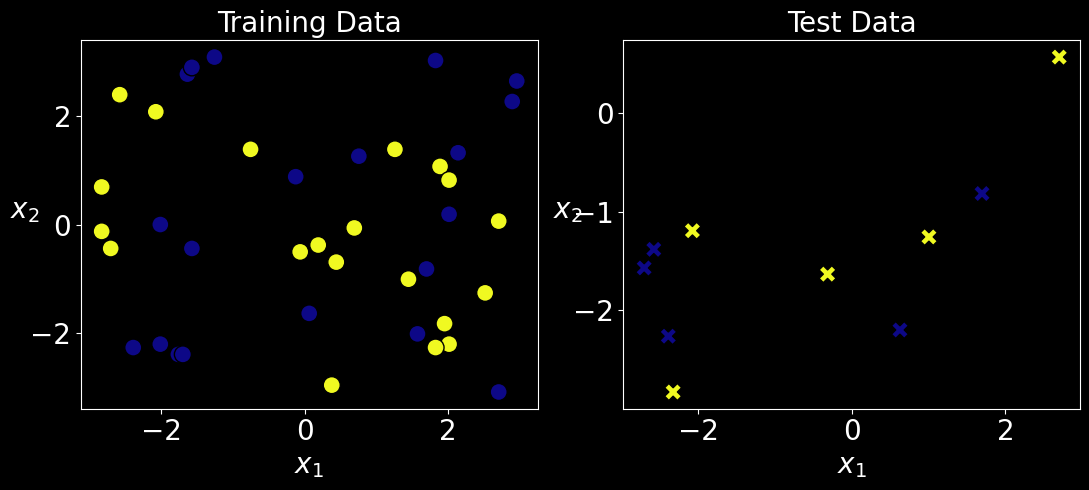

In [7]:
from qmlab.data_generation.havlicek import havlicek_data
from qmlab.plotting import plot_2d_data_with_train_test_split, plot_decision_boundaries
from sklearn.svm import SVC
from qmlab.qsvm import QSVC
from qmlab.kernel import FidelityQuantumKernel
from sklearn import metrics
import numpy as np

random_state = 12345


X_train, y_train, X_test, y_test = havlicek_data(
    training_examples_per_class=20,
    test_examples_per_class=5,
    feature_dimension=2,
    delta=0.3,
    interval=(-np.pi, np.pi)
)

plot_2d_data_with_train_test_split(
    X_train, y_train, X_test, y_test, separate_plots=True
)


In [8]:
svm = SVC(kernel="rbf", random_state=random_state)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
metrics.accuracy_score(y_pred, y_test)

0.6

$$ \tt{accuracy}(\mathcal{\hat{Y}}, \mathcal{Y}) = \frac{1}{m} \sum_{i=1}^m \delta_{\hat{y}_i\,y_i} \qquad 
\mathcal{\hat{Y}}, \mathcal{Y} \in \mathbb{R}^d$$ 

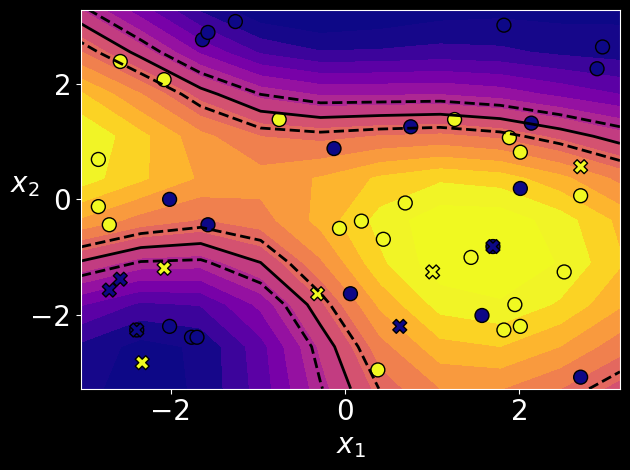

In [9]:
plot_decision_boundaries(svm, X_train, y_train, X_test, y_test)

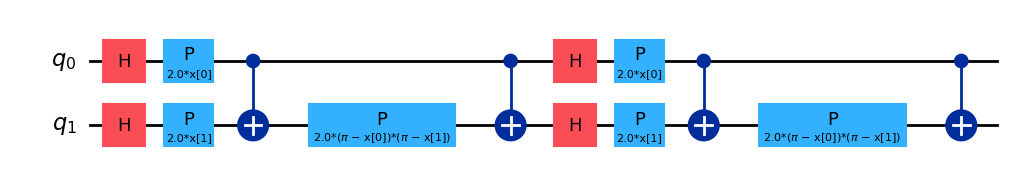

In [12]:
from qiskit.circuit.library import ZZFeatureMap
from qiskit_algorithms.state_fidelities import ComputeUncompute
from qiskit.primitives import Sampler

qfm = ZZFeatureMap(feature_dimension=2)
fidelity = ComputeUncompute(sampler=Sampler())

quantum_kernel = FidelityQuantumKernel(feature_map=qfm, fidelity=fidelity)

kernel_train = quantum_kernel.evaluate_kernel(X_train)
kernel_test = quantum_kernel.evaluate_kernel(X_test, X_train)

qsvm = SVC(kernel="precomputed", random_state=random_state)
qsvm.fit(kernel_train, y_train)
qfm.decompose().draw(output="mpl")

In [ ]:
qsvm.score(kernel_test, y_test)

1.0

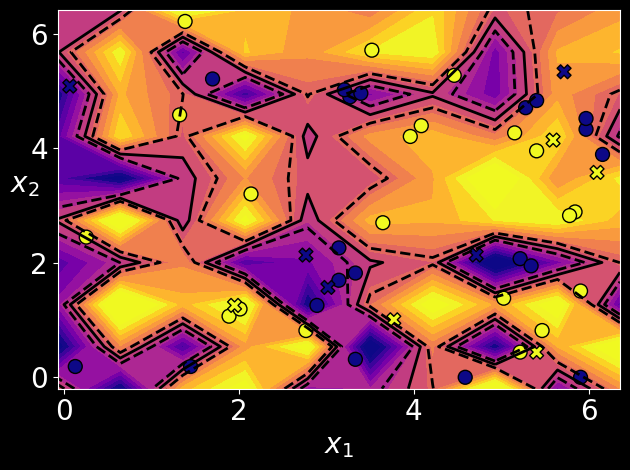

In [ ]:
fidelity = ComputeUncompute(sampler=Sampler())

qfm = ZZFeatureMap(feature_dimension=2, reps=2, entanglement="linear")

quantum_kernel = FidelityQuantumKernel(fidelity=fidelity, feature_map=qfm)

qsvc = QSVC(
    quantum_kernel=quantum_kernel, num_qubits=2, reps=2, feature_map=qfm, random_state=random_state
)
qsvc.fit(X_train, y_train)
plot_decision_boundaries(qsvc, X_train, y_train, X_test, y_test)

In [ ]:
y_pred = qsvc.predict(X_test)
metrics.balanced_accuracy_score(y_pred, y_test)

1.0